## Set up

In [1]:
import pickle
from copy import deepcopy
import pandas as pd
import numpy as np
from osgeo.gdalconst import *
from osgeo import gdal
from scipy.ndimage import gaussian_filter, median_filter
#visualization
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#import custom functions
from custom_functions import *

## Combine Forests with different features

Versions:
- 10_bin14_13: base of version 10 with add on forest_bin14 for class 14 and taking 15 and 17 from version 13 in that order
    - demo accuracy 52.40 (b: 41.22%)
- 10_xgbin14_13: base of version 10 with add on xgb_bin14 for class 14 and taking 15 and 17 from version 13 in that order
    - demo accuracy 52.45 (b: 41.35%)
- 14_xgbin14_13: base of version 14 with add on xg_bin14 for class 14 and taking 15 from version 13 in that order
    - demo accuracy 55.92 (b: 43.04)
    - trois accuracy 57.00 (b: 41.27)
    - calgary accuracy 42.49 (b: 25.05)
- 15_xgbin14_13: base of version 15 with add on xg_bin14 for class 14 & taking 17 from v. 13 in that order
    - demo: 55.60 (38.28)
    - cal: 53.52 (31.75)
    
    
    
Processing:
- version 10: target_outlier = 'B01f', calculate_layers = True, nrcan_name = nrcan_name
- version 13: gaussian = True, clustering = '../models/kcluster_13.sav', calculate_layers = True,
- bin14: calculate_layers = 'Extra', nrcan_name = nrcan_name

In [3]:
#load in models - 14_bbin14_13
forest_14 = pickle.load(open('../models/forest14.sav', 'rb'))
forest_13 = pickle.load(open('../models/forest_13.sav', 'rb'))
xgb_bin14 = pickle.load(open('../models/xgb_bin14.sav', 'rb'))
forest_15 = pickle.load(open('../models/forest15.sav', 'rb'))

In [ ]:
#load in models
forest_14 = pickle.load(open('../models/forest14.sav', 'rb'))
forest_15 = pickle.load(open('../models/forest15.sav', 'rb'))
forest_13 = pickle.load(open('../models/forest_13.sav', 'rb'))
xgb_bin14_v2 = pickle.load(open('../models/xgb_bin14_v2.sav', 'rb'))

### Demo test

In [ ]:
#Processing for 14_bbin14_13
process_14_bin14_13 = {
                       'target_edge': ['B8A', None, None],
                        'target_outlier' : ['B01f', False, False],
                        'gaussian' : [False, False, True],
                        'clustering' : [False, False, '../models/kcluster_13.sav'],
                        'calculate_layers' : [True, 'Extra', True]}
binary_14_bin14_13 = {'model': [1], 'class': [14]}

combo_pred, y_true = predict_combo([forest_14, xgb_bin14, forest_13], '../data_tests/demo_site.csv',  '../data_tests/demo/raws',
                                  process_dict = process_14_bin14_13, binary = binary_14_bin14_13)

In [14]:
#Processing for 14_bbin14_13
process_15_bin14_13 = {
                       'target_edge': ['B8A', None, None],
                        'geocoords': [True, False, False],
                        'target_outlier' : [False, False, False],
                        'gaussian' : [False, False, True],
                        'clustering' : [False, False, '../models/kcluster_13.sav'],
                        'calculate_layers' : [True, 'Extra', True]}
binary_15_bin14_13 = {'model': [1], 'class': [14]}

combo_pred, y_true = predict_combo([forest_15, xgb_bin14, forest_13], '../data_tests/demo_site.csv',  '../data_tests/demo/raws',
                                  class_lists = [[14], [15, 17]], process_dict = process_15_bin14_13, binary = binary_15_bin14_13)

getting edge


In [ ]:
process_15_bin14_13 = {
                       'target_edge': ['B8A', 'B8A', 'B8A', None ],
                        'geocoords': [False, True, True, False],
                        'target_outlier' : ['B01f', False, False, False],
                        'gaussian' : [False, False, False, True],
                        'clustering' : [False, False, False, '../models/kcluster_13.sav'],
                        'calculate_layers' : [True, True, True, True]}
binary_15_bin14_13 = {'model': [1], 'class': [14]}

combo_pred, y_true = predict_combo([forest_14, xgb_bin14_v2, forest_15, forest_13], '../data_tests/demo_site.csv',  '../data_tests/demo/raws',
                                  class_lists = [[14], [1], [15]], process_dict = process_15_bin14_13, binary = binary_15_bin14_13)

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, balanced_accuracy_score

C:\Users\fynn\Documents\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.3828362648858455
0.5560043809523809


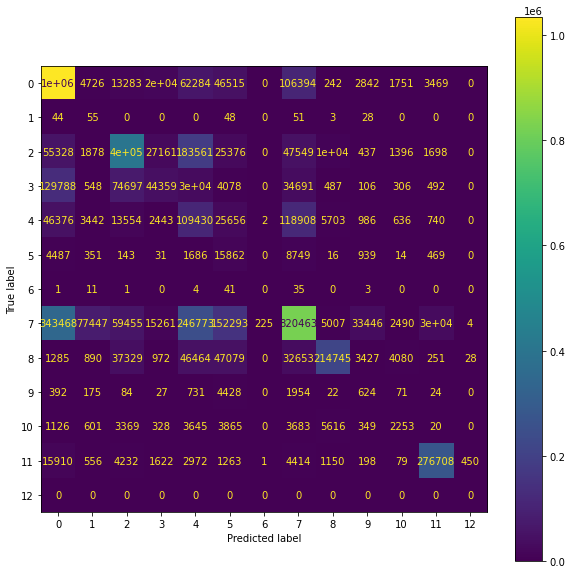

In [16]:
#accuracy
print(balanced_accuracy_score(y_true, combo_pred))
print(accuracy_score(y_true, combo_pred))

#confusion matrix
cm_forest = confusion_matrix(y_true, combo_pred)
cm_forest_fig = ConfusionMatrixDisplay(confusion_matrix = cm_forest)
fig, ax = plt.subplots(figsize=(10,10))
cm_forest_fig.plot(ax = ax)

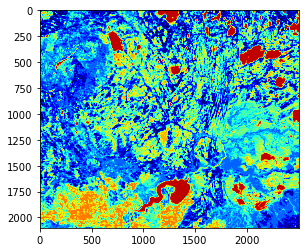

In [17]:
map_pred = np.asarray(combo_pred.values).reshape(2100, 2500)
cmap = cm.get_cmap('jet', 19)    # 11 discrete colors
prediction_map = plt.imshow(map_pred, cmap=cmap)

In [ ]:
map_pred = np.asarray(y_true).reshape(2100, 2500)
cmap = cm.get_cmap('jet', 19)    # 11 discrete colors
prediction_map = plt.imshow(map_pred, cmap=cmap)

In [12]:
#OPTIONAL: save matrix and map as versions
#save confusion matrix
cm_forest_fig.figure_.savefig(os.path.join('evaluation', 'demo/combo', '15_xgbin14_13_cm.png'))

#save prediction map
prediction_map.figure.savefig(os.path.join('evaluation', 'demo/combo', '15_xgbin14_13_map.png'))

In [9]:
print(classification_report(y_true, combo_pred, zero_division = 1))

              precision    recall  f1-score   support

           1       0.63      0.80      0.71   1295963
           2       0.00      0.24      0.00       229
           5       0.66      0.53      0.59    754883
           6       0.40      0.14      0.21    319587
           8       0.16      0.33      0.22    327876
          10       0.05      0.48      0.09     32747
          12       0.00      0.00      0.00        96
          14       0.70      0.46      0.55   1786474
          15       0.88      0.55      0.68    389203
          16       0.01      0.07      0.02      8532
          17       0.17      0.09      0.12     24855
          18       0.88      0.89      0.89    309555
          19       0.00      1.00      0.00         0

    accuracy                           0.56   5250000
   macro avg       0.35      0.43      0.31   5250000
weighted avg       0.64      0.56      0.58   5250000



### Random extent test

In [10]:
#X_ran, y_ran = process_data(None, '../data_tests/trois/raws', nrcan_name = 'NRCAN_transformed.tif', index = [-14, -11], gaussian = True, clustering = 'models/kcluster_13.sav', calculate_layers = True)
X_ran, y_ran = process_data(None, '../data_tests/calgary/raws', nrcan_name = 'NRCAN_transformed.tif', index = [-14, -11], target_edge = 'B8A', target_outlier = 'B01f', calculate_layers = True)

getting edge


In [ ]:
map_pred = np.asarray(y_ran.values).reshape(656, 1250)
cmap = cm.get_cmap('jet', 19)    # 11 discrete colors
prediction_map = plt.imshow(map_pred, cmap=cmap)

#### Combination

In [11]:
combo_pred, y_true = predict_combo([forest_15, xgb_bin14, forest_13], None, '../data_tests/calgary/raws', index = [-14, -11], 
                                   process_dict = process_15_bin14_13, binary = binary_15_bin14_13, nrcan_name = 'NRCAN_transformed.tif')

getting edge


In [ ]:
combo_pred, y_true = predict_combo([forest_14, xgb_bin14, forest_13], None, '../data_tests/calgary/raws', index = [-14, -11], 
                                   process_dict = process_10_bin14_13, binary = binary_10_bin14_13, nrcan_name = 'NRCAN_transformed.tif')

0.3174602980361865
0.5351792656587473


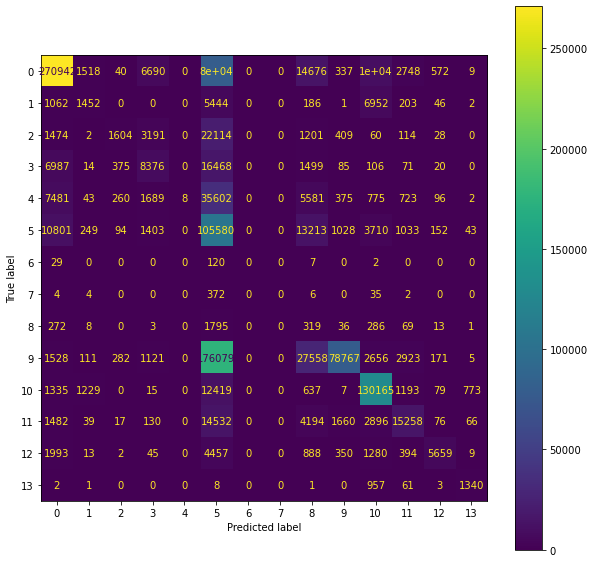

In [13]:
#accuracy
print(balanced_accuracy_score(y_true, combo_pred))
print(accuracy_score(y_true, combo_pred))

#confusion matrix
cm_forest = confusion_matrix(y_true, combo_pred)
cm_forest_fig = ConfusionMatrixDisplay(confusion_matrix = cm_forest)
fig, ax = plt.subplots(figsize=(10,10))
cm_forest_fig.plot(ax = ax)

In [ ]:
map_pred = np.asarray(combo_pred.values).reshape(926, 1250)
cmap = cm.get_cmap('jet', 19)    # 11 discrete colors
prediction_map = plt.imshow(map_pred, cmap=cmap)

In [ ]:
map_pred = np.asarray(y_true).reshape(926, 1250)
cmap = cm.get_cmap('jet', 19)    # 11 discrete colors
prediction_map = plt.imshow(map_pred, cmap=cmap)

In [ ]:
print(classification_report(y_true, combo_pred, zero_division = 1))

#### Forest only

In [ ]:
forest_pred = forest_14.predict(X_ran)

In [ ]:
map_pred = np.asarray(forest_pred).reshape(926, 1250)
cmap = cm.get_cmap('jet', 19)    # 11 discrete colors
prediction_map = plt.imshow(map_pred, cmap=cmap)

In [ ]:
print(balanced_accuracy_score(y_ran, forest_pred))
print(accuracy_score(y_ran, forest_pred))

#confusion matrix
cm_forest = confusion_matrix(y_true, forest_pred)
cm_forest_fig = ConfusionMatrixDisplay(confusion_matrix = cm_forest, display_labels = forest_10.classes_)
fig, ax = plt.subplots(figsize=(10,10))
cm_forest_fig.plot(ax = ax)

In [ ]:
print(classification_report(y_true, combo_pred, zero_division = 1))

In [ ]:
print(classification_report(y_true, forest_pred, zero_division = 1))

## Combine seperate models

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier